<a href="https://colab.research.google.com/github/Oriol17UC3M/EODP_Oriol_Espejo/blob/main/Proyecto_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **TRABAJO FINAL DATOS**



In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
from sklearn.preprocessing import PolynomialFeatures
import scipy.io
from collections import Counter
import re #sirve para manejar texto y buscar palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**1. Análisis exploratorio del conjunto de datos**

Carga de datos

In [7]:
data = pd.read_csv('politicES_phase_2_test_codalab.csv')
print("Número de instancias:")
print(data.shape[0])
print("Número de variables:")
print(data.shape[1])

Número de instancias:
43760
Número de variables:
6


In [8]:
print("Variables:")
print(data[:0])

Variables:
Empty DataFrame
Columns: [label, gender, profession, ideology_binary, ideology_multiclass, tweet]
Index: []


In [9]:
print(data.iloc[1772].values)

['0c92efbe64110f10ba794603824cd186' 'male' 'politician' 'left'
 'moderate_left'
 '⚓ Presentaré, mañana en la UE, la estrategia para consolidar la [HASHTAG] como sistema sostenible de producción de . ⚓ Objetivos:. 🔹 Fortalecimiento de las organizaciones de productores. 🔹 Bienestar animal. 🔹 Incremento de mujeres en esta actividad']


In [10]:
print(data.isnull().any())

label                  False
gender                 False
profession             False
ideology_binary        False
ideology_multiclass    False
tweet                  False
dtype: bool




*   Estadística de los datos




30480


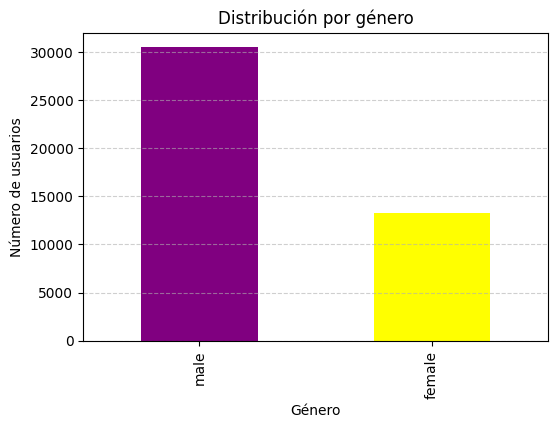

In [11]:
#Género
gender = data['gender']
count= data['gender'].value_counts()
print(count.male)
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['purple', 'yellow'])

plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

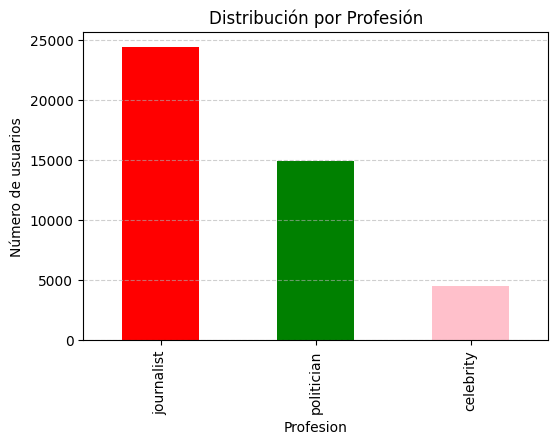

In [12]:
#Profesión
Profession = data['profession']
count= data['profession'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green','pink'])

plt.title("Distribución por Profesión")
plt.xlabel("Profesion")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

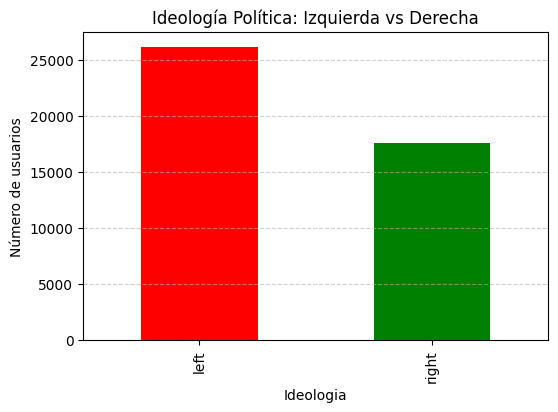

In [13]:
#ideology_binary
Ideologia = data['ideology_binary']
count= data['ideology_binary'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green'])

plt.title("Ideología Política: Izquierda vs Derecha")
plt.xlabel("Ideologia")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

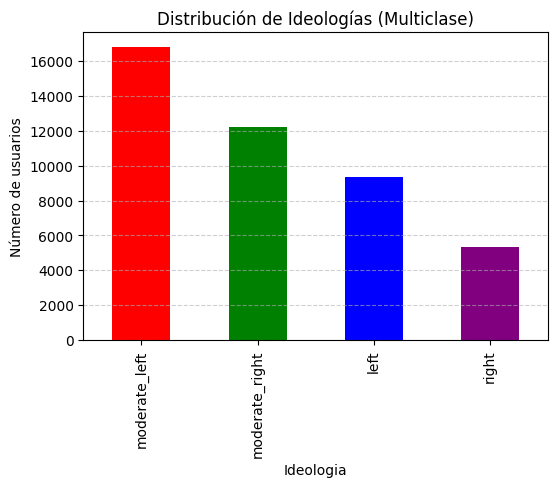

In [14]:
#ideology_multiclass
Ideologia_multi= data['ideology_multiclass']
count= data['ideology_multiclass'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green','blue','purple'])

plt.title("Distribución de Ideologías (Multiclase)")
plt.xlabel("Ideologia")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

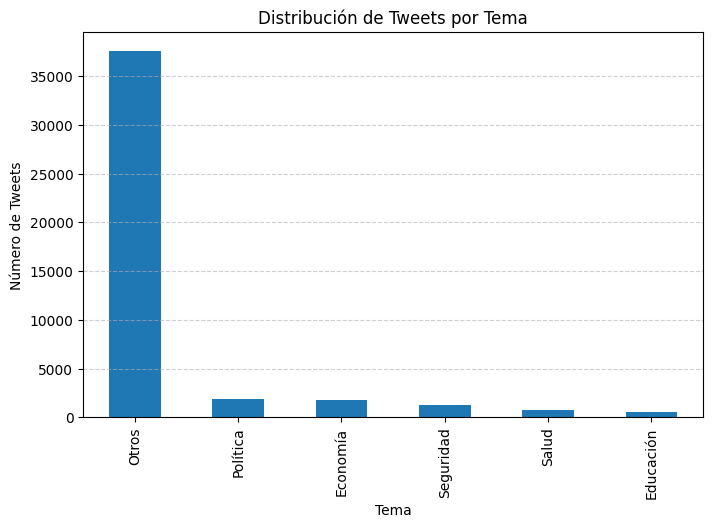

In [15]:
#tweet
temas = {
    "Economía": ["economía", "inflación", "precio", "salario", "pobreza", "impuestos"],
    "Salud": ["covid", "salud", "hospital", "vacuna"],
    "Educación": ["educación", "escuela", "universidad", "estudiante"],
    "Seguridad": ["seguridad", "violencia", "delito", "policía", "crimen"],
    "Política": ["elección", "voto", "campaña", "político", "partido"],
}
def clasificar_tema(texto):
    texto = texto.lower()
    for tema, palabras in temas.items():
        if any(palabra in texto for palabra in palabras):
            return tema
    return "Otros"
data["tema"] = data["tweet"].apply(clasificar_tema)
conteo = data["tema"].value_counts()

plt.figure(figsize=(8,5))
conteo.plot(kind='bar')

plt.title("Distribución de Tweets por Tema")
plt.xlabel("Tema")
plt.ylabel("Número de Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()




*   Análisis preliminar del texto




In [16]:

import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español (solo la primera vez)
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
def limpiar_texto(text):
    text = text.lower()  # minusculas
    text = re.sub(r"http\S+", "", text)  # quitar URLs
    text = re.sub(r"[^a-záéíóúñ\s]", "", text)  # quitar signos y números
    return text

# Limpiar los tweets
tweet_limpio = data['tweet'].apply(limpiar_texto)
tweet = " ".join(tweet_limpio).split()# Unir todos los tweets y separar palabras
# Filtrar stopwords y palabras irrelevantes como 'user'
tweet_filtrado = [word for word in tweet if word not in stop_words and word != 'user']
contador = Counter(tweet_filtrado)# Contar palabras
print(contador.most_common(20))# Mostrar las 20 palabras más frecuentes


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('politician', 4974), ('si', 4170), ('politicalparty', 3943), ('hashtag', 3937), ('hoy', 2848), ('gobierno', 2306), ('españa', 2231), ('gracias', 2183), ('años', 2111), ('ser', 2050), ('madrid', 1821), ('hace', 1667), ('ley', 1543), ('siempre', 1477), ('día', 1456), ('solo', 1435), ('ahora', 1432), ('aquí', 1405), ('puede', 1402), ('así', 1396)]


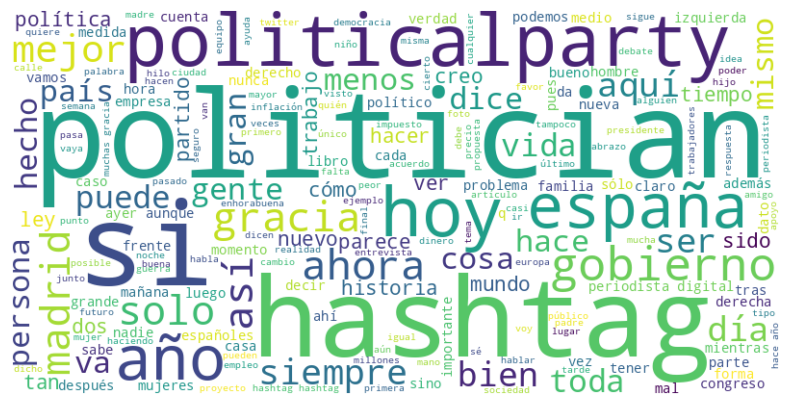

In [17]:


# Crear nube de palabras para todos los tweets
text = " ".join(tweet_filtrado)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**2. Representación vectorial**
De la misma forma que hicimos en clase, antes de continuar con la tarea de vectorización, debemos estructurar y limpiar el texto para conservar únicamente la información que nos permita capturar el contenido semántico del corpus. Esto mejorará el resultado de nuestros embeddings.
1.   Manipulación del texto (Text Wrangling)  
2.   Tokenización  
3.   Homogeneización  
4.   Limpieza  

Importación de librerías

In [18]:
import re
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

wnl = WordNetLemmatizer()

def check_nltk_packages():
    packages = ['punkt','stopwords','omw-1.4','wordnet']
    for package in packages:
        try:
            nltk.data.find(package)
        except LookupError:
            nltk.download(package)

check_nltk_packages()

try:
    import lxml
except ModuleNotFoundError:
    %pip install lxml

try:
    import contractions
except ModuleNotFoundError:
    %pip install contractions
    import contractions

stopwords_en = stopwords.words('english')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text Wrangling: Eliminamos URLs, HTML y expandimos contracciones

In [19]:
def wrangling(text):
    # Eliminamos HTML
    soup = BeautifulSoup(text, "lxml")
    clean = soup.get_text()

    # Eliminamos URLs
    clean = re.sub(r'https://\S+|www\.\S+', '', clean)

    # Expandimos contracciones
    clean = contractions.fix(clean)

    return clean

In [20]:
example = data['tweet'].iloc[0]
print("ORIGINAL:\n", example)
print("\nWRANGLING:\n", wrangling(example))


ORIGINAL:
 Ayer, en Guadalajara: feministas arrojaban ácido a católicos que protegían la catedral. Quemaron a mujeres católicas con esas sustancias. Un hombre quiso sacarles los recipientes y le partieron un bate en la cabeza. Terminó internado. ¿Los medios? En absoluto silencio.

WRANGLING:
 Ayer, en Guadalajara: feministas arrojaban ácido a católicos que protegían la catedral. Quemaron a mujeres católicas con esas sustancias. Un hombre quiso sacarles los recipientes y le partieron un bate en la cabeza. Terminó internado. ¿Los medios? En absoluto silencio.


Tokenización

In [21]:
def tokenize(text):
    return wordpunct_tokenize(text)

example_w = wrangling(example)
print("WRANGLED:\n", example_w)
print("\nTOKENIZADO:\n", tokenize(example_w))


WRANGLED:
 Ayer, en Guadalajara: feministas arrojaban ácido a católicos que protegían la catedral. Quemaron a mujeres católicas con esas sustancias. Un hombre quiso sacarles los recipientes y le partieron un bate en la cabeza. Terminó internado. ¿Los medios? En absoluto silencio.

TOKENIZADO:
 ['Ayer', ',', 'en', 'Guadalajara', ':', 'feministas', 'arrojaban', 'ácido', 'a', 'católicos', 'que', 'protegían', 'la', 'catedral', '.', 'Quemaron', 'a', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', '.', 'Un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'y', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', '.', 'Terminó', 'internado', '.', '¿', 'Los', 'medios', '?', 'En', 'absoluto', 'silencio', '.']


Homogenización

In [22]:
def homogenize(tokens):
    return [tok.lower() for tok in tokens if tok.isalnum()]

example_tok = tokenize(example_w)
print("TOKENIZADO:\n", example_tok)
print("\nHOMOGENEIZADO:\n", homogenize(example_tok))


TOKENIZADO:
 ['Ayer', ',', 'en', 'Guadalajara', ':', 'feministas', 'arrojaban', 'ácido', 'a', 'católicos', 'que', 'protegían', 'la', 'catedral', '.', 'Quemaron', 'a', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', '.', 'Un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'y', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', '.', 'Terminó', 'internado', '.', '¿', 'Los', 'medios', '?', 'En', 'absoluto', 'silencio', '.']

HOMOGENEIZADO:
 ['ayer', 'en', 'guadalajara', 'feministas', 'arrojaban', 'ácido', 'a', 'católicos', 'que', 'protegían', 'la', 'catedral', 'quemaron', 'a', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', 'un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'y', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', 'terminó', 'internado', 'los', 'medios', 'en', 'absoluto', 'silencio']


Cleaning
Lematización + Stopwords

In [23]:
def clean(tokens):
    # Lematizamos
    lemmas = [wnl.lemmatize(tok) for tok in tokens]
    # Quitamos stopwords
    cleaned = [tok for tok in lemmas if tok not in stopwords_en]
    return cleaned

example_h = homogenize(example_tok)
print("HOMOGENEIZADO:\n", example_h)
print("\nCLEANED:\n", clean(example_h))


HOMOGENEIZADO:
 ['ayer', 'en', 'guadalajara', 'feministas', 'arrojaban', 'ácido', 'a', 'católicos', 'que', 'protegían', 'la', 'catedral', 'quemaron', 'a', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', 'un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'y', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', 'terminó', 'internado', 'los', 'medios', 'en', 'absoluto', 'silencio']

CLEANED:
 ['ayer', 'en', 'guadalajara', 'feministas', 'arrojaban', 'ácido', 'católicos', 'que', 'protegían', 'la', 'catedral', 'quemaron', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', 'un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', 'terminó', 'internado', 'los', 'medios', 'en', 'absoluto', 'silencio']


In [26]:

def preprocess(text):
    w = wrangling(text)
    t = tokenize(w)
    h = homogenize(t)
    c = clean(h)
    return c

data['clean_tweet'] = data['tweet'].apply(preprocess)


In [27]:
data['clean_tweet'] = data['tweet'].apply(preprocess)


**Una vez preprocesdo el texto podemos proceder con la vectorización**

In [28]:
from termcolor import colored

corpus = data['clean_tweet']

print(colored('Number of documents in corpus: '+str(len(corpus)), 'green'))

print(colored('\n============= First tweet =============', 'blue'))
print(corpus.iloc[0])

print(colored('\n============= Second tweet =============', 'blue'))
print(corpus.iloc[1])


Number of documents in corpus: 43760

============= First tweet =============
['ayer', 'en', 'guadalajara', 'feministas', 'arrojaban', 'ácido', 'católicos', 'que', 'protegían', 'la', 'catedral', 'quemaron', 'mujeres', 'católicas', 'con', 'esas', 'sustancias', 'un', 'hombre', 'quiso', 'sacarles', 'los', 'recipientes', 'le', 'partieron', 'un', 'bate', 'en', 'la', 'cabeza', 'terminó', 'internado', 'los', 'medios', 'en', 'absoluto', 'silencio']

============= Second tweet =============
['chile', 'vamos', 'sea', 'la', 'centro', 'derechita', 'cobarde', 'pactó', 'hoy', 'con', 'el', 'gobierno', 'izquierdista', 'de', 'boric', 'para', 'continuar', 'con', 'la', 'farsa', 'del', 'proceso', 'constituyente', 'que', 'acaba', 'de', 'ser', 'aplastado', 'en', 'la', 'urnas', 'una', 'vez', 'más', 'queda', 'demostrado', 'que', 'la', 'centro', 'derecha', 'e', 'oposición', 'de', 'nada']


Bag of Words

In [29]:
from gensim.corpora import Dictionary

# Crear diccionario directamente del corpus
D = Dictionary(corpus)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])


ModuleNotFoundError: No module named 'gensim'